In [15]:
using DynamicalSystems
using PyPlot
using FFTW
using LinearAlgebra

function logistic_map(r, x0, n)
    x = zeros(n)
    x[1] = x0
    for i in 2:n
        x[i] = r * x[i-1] * (1 - x[i-1])
    end
    return x
end


# --- Example signals ---
t = 0:0.05:50
#pure sine
x = tan.(t);
# sine + harmonic
#x = sin.(t) .- 0.5*sin.(3t);
#quasi-periodic
#x = 3*sin.(t) .+ cos.(sqrt(2) .* t);
#y = sin.(1.5 .* t);
y = sin.(t);
# chaotic΄΄
#x = logistic_map(3.9, 0.25, length(t))

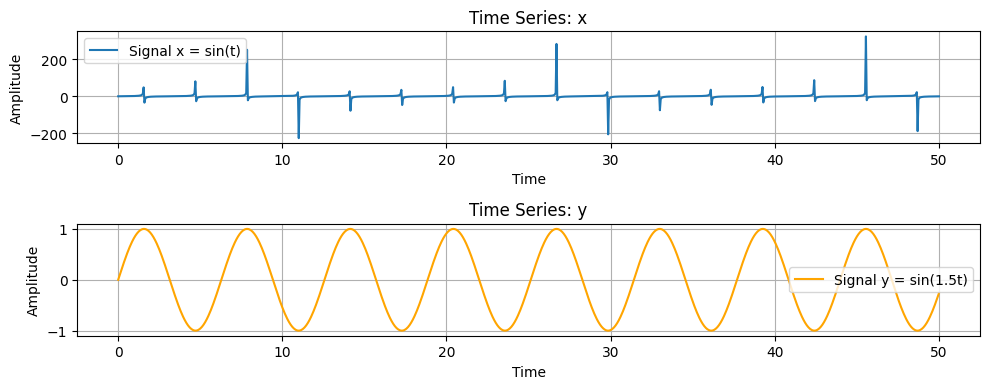

In [16]:
# ---------------------------------------------------
# 1. Time Series
# ---------------------------------------------------
figure(figsize=(10,4))
subplot(2,1,1)
plot(t, x, label="Signal x = sin(t)")
xlabel("Time")
ylabel("Amplitude")
title("Time Series: x")
legend()
grid(true)

subplot(2,1,2)
plot(t, y, color="orange", label="Signal y = sin(1.5t)")
xlabel("Time")
ylabel("Amplitude")
title("Time Series: y")
legend()
grid(true)
tight_layout()


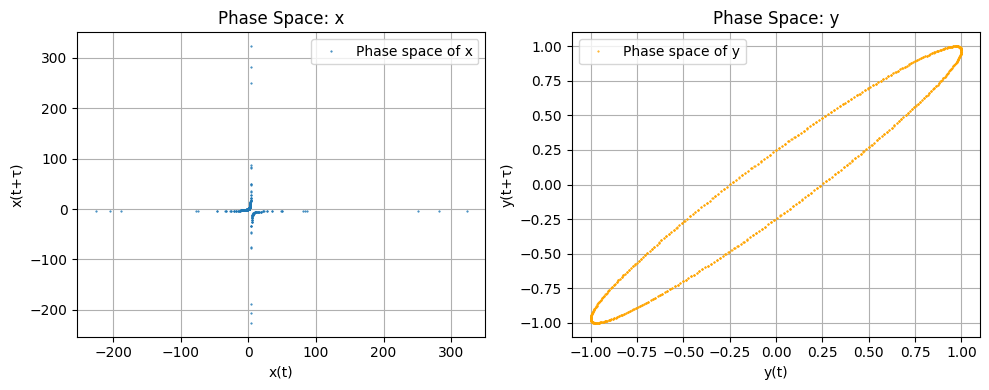

In [17]:
# ---------------------------------------------------
# 2. Phase Space Orbits (Delay Embedding)
# ---------------------------------------------------
m, τ = 2, 5
X = embed(x, m, τ)
Y = embed(y, m, τ)

figure(figsize=(10,4))
subplot(1,2,1)
plot(X[:,1], X[:,2], ".", ms=1, label="Phase space of x")
xlabel("x(t)")
ylabel("x(t+τ)")
title("Phase Space: x")
legend()
grid(true)

subplot(1,2,2)
plot(Y[:,1], Y[:,2], ".", ms=1, color="orange", label="Phase space of y")
xlabel("y(t)")
ylabel("y(t+τ)")
title("Phase Space: y")
legend()
grid(true)
tight_layout()


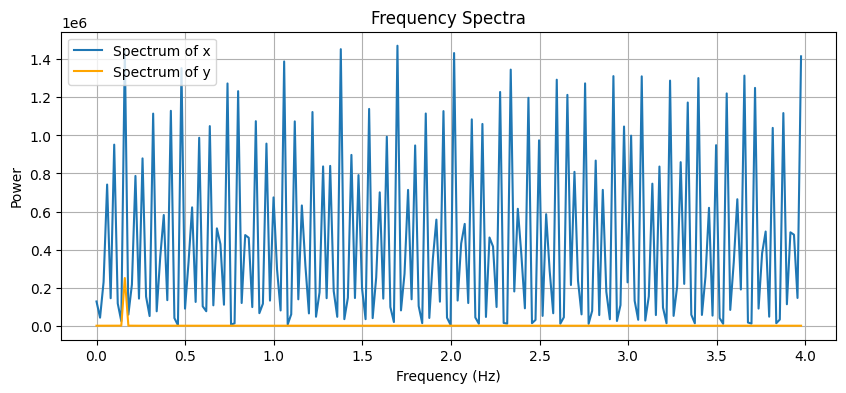

In [18]:
# ---------------------------------------------------
# 3. Frequency Spectrum (FFT)
# ---------------------------------------------------
N = length(x)
freqs = (0:N-1) ./ (N*0.05)   # frequency axis (sampling Δt = 0.05)

Xf = abs.(fft(x)).^2
Yf = abs.(fft(y)).^2

figure(figsize=(10,4))
plot(freqs[1:200], Xf[1:200], label="Spectrum of x")
plot(freqs[1:200], Yf[1:200], label="Spectrum of y", color="orange")
xlabel("Frequency (Hz)")
ylabel("Power")
title("Frequency Spectra")
legend()
grid(true)

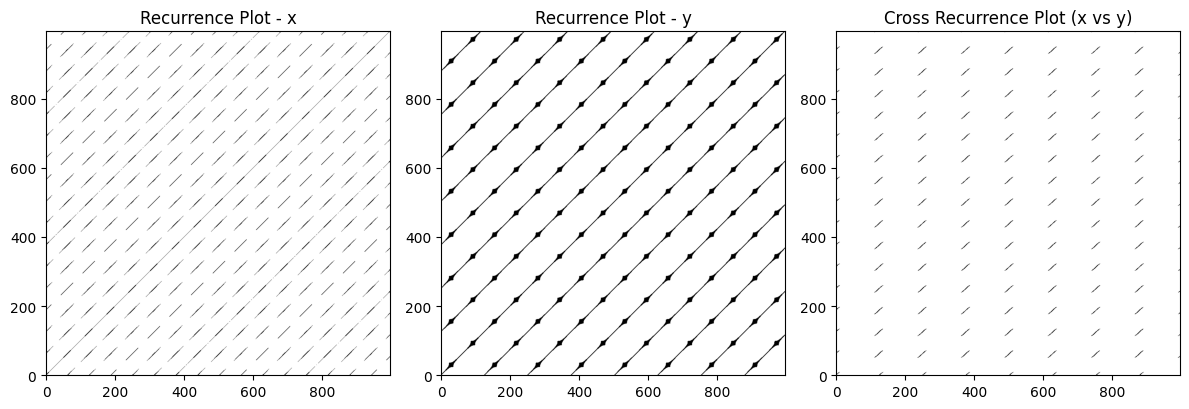

In [19]:
# ---------------------------------------------------
# 4. Recurrence Plots
# ---------------------------------------------------
ε = 0.1
R_x = RecurrenceMatrix(X, ε, metric=Euclidean())
R_y = RecurrenceMatrix(Y, ε, metric=Euclidean())
CRP = CrossRecurrenceMatrix(X, Y, ε, metric=Euclidean())

figure(figsize=(12,4))
subplot(1,3,1)
imshow(R_x, cmap="binary", origin="lower")
title("Recurrence Plot - x")

subplot(1,3,2)
imshow(R_y, cmap="binary", origin="lower")
title("Recurrence Plot - y")

subplot(1,3,3)
imshow(CRP, cmap="binary", origin="lower")
title("Cross Recurrence Plot (x vs y)")

tight_layout()
show()

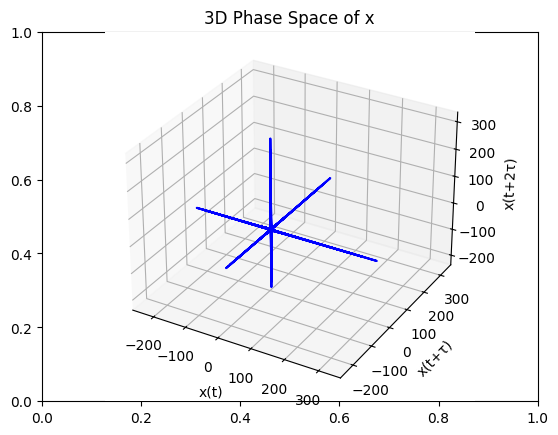

PyObject Text(0.5, 1.0, '3D Phase Space of x')

In [20]:
X3 = embed(x, 3, 5)

figure()
plot3D(X3[:,1], X3[:,2], X3[:,3], color="blue")
xlabel("x(t)")
ylabel("x(t+τ)")
zlabel("x(t+2τ)")
title("3D Phase Space of x")


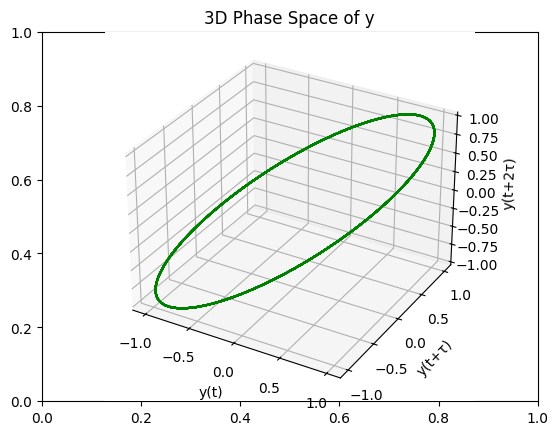

PyObject Text(0.5, 1.0, '3D Phase Space of y')

In [7]:
Y3 = embed(y, 3, 5)

figure()
plot3D(Y3[:,1], Y3[:,2], Y3[:,3], color="green")
xlabel("y(t)")
ylabel("y(t+τ)")
zlabel("y(t+2τ)")
title("3D Phase Space of y")
